# Overview & Objective

Hello! This is a Kaggle case study completed in Feb 2022 (https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness/)

The objective of this project is to explore a dataset containing customer information for treadmill products for a retail store called Cardio Good Fitness.

We want to identify differences between the customers of each product, as well as any relationships between the different attributes of the customers. Additionally, we want to look out for any other line of questioning that could be relevant for the business. 

## Key Goals

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analysis
3. Generate a set of insights and recommendations that will help the company in targeting new customers

## Data Dictionary

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run

## Importing necessary packages, setting visual preferences for outputs & plots

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #This is a warning library, but is not necessary
warnings.filterwarnings('ignore')

sns.set_theme(color_codes=True) #Sets the visual theme for all matplotlib and seaborn plots

pd.set_option('display.float_format', lambda x: '%.5f' % x) #Supresses numerical display in scientific notations

## Reading in dataset, running diagnostic checks

In [6]:
cardio = pd.read_csv('CardioGoodFitness.csv') #Reads in the csv file containing dataset

cardio.head(5) #Shows the first 5 rows of the dataframe

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Observation:
1. The data appeas to be consistent with the description provided in the Data Dictionary. 
2. This volume metric is vague in that it does not specify whether this is the number of miles that a customer expects to run during the lifetime of the machine, or per year, or per another timeframe - if this was an ask for a client, it would be in our best interest to clarify this.
3. For the sake of the assignment, I've consulted the forum to confirm that we can consider the 'Miles' variable as the number of miles the customer expects to run in a year.


In [7]:
cardio.shape #Checks the shape of the dataset

(180, 9)

Observation: We have 180 records of consumer data across 9 columns

In [8]:
cardio.dtypes #Checks the datatypes of the variables and gives us a chance to QA if the data is loaded in correctly

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Observations:
1. Product, Gender, Martital Status are objects.
2. All other variables are numerical and their datatype (int64) aligns, even Fitness - since it is a numerical value on a scale I'd like to keep the datatype as is.
3. Variable datatypes match their description (i.e. Education being numerical to represent the no. of years the customer has).

In [9]:
cardio.describe() #Lets us analyze the quantitative variables at a glance

,Age,Education,Usage,Fitness,Income,Miles
count,180.00000,180.00000,180.00000,180.00000,180.00000,180.00000
mean,28.78889,15.57222,3.45556,3.31111,53719.57778,103.19444
std,6.94350,1.61705,1.08480,0.95887,16506.68423,51.86360
min,18.00000,12.00000,2.00000,1.00000,29562.00000,21.00000
25%,24.00000,14.00000,3.00000,3.00000,44058.75000,66.00000
50%,26.00000,16.00000,3.00000,3.00000,50596.50000,94.00000
75%,33.00000,16.00000,4.00000,4.00000,58668.00000,114.75000
max,50.00000,21.00000,7.00000,5.00000,104581.00000,360.00000


Observations:
1. The means for age, usage, fitness, income, and miles land between the 50% and 75% percentiles of the data, which could imply that those variables skew right of the distribution to varying degrees.
2. However, the ranges across the variables are quite wide. The max values across age, usage, fitness, income depart significantly from the 75% percentile mark which also implies the presence of a lot of outliers to the right of the distribution.
3. The means for these variables are therefore most likely pulled up due to the influence of these high outliers. Their distributions most likely skew to the left instead, seeing how the IQR is much closer to the min values than to the max. This means this dataset is skewed relatively younger, lower-income and lower-milage (i.e. these customers are not running marathons on these products).

In [10]:
cardio['Product'].unique()
#Prints the unique values of the Product variable

array(['TM195', 'TM498', 'TM798'], dtype=object)

Observation:
1. There are three distinct product types that we need to be aware of.
2. Given that the objective is to ID the differences in consumers for each product, we will potentially be seeking to ID three consumer groups.

## Exploring the relationships between numerical variables

Now that we understand the nature and contents of our dataset, as well as some distribution caveats to keep in mind, we can start implementing visualizations.

First, we wil start by analyzing our numerical variables.

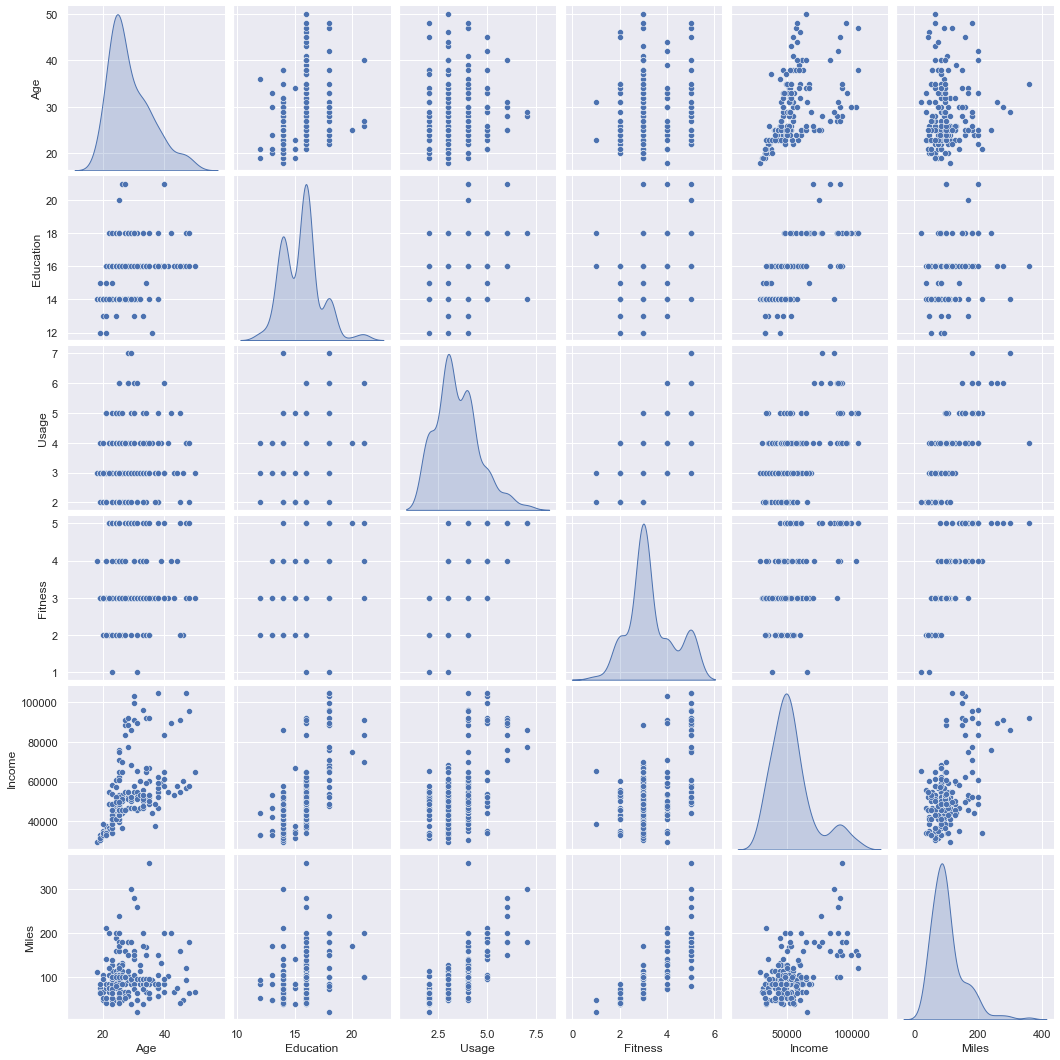

In [11]:
sns.pairplot(cardio, diag_kind="kde");
#Using pair plots and correlation plots to look at the relationships
#between numerical values

In [12]:
correlation = cardio.corr()
#Creates a 2D matrix with correlation plots
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00000,0.28050,0.01506,0.06110,0.51341,0.03662
Education,0.28050,1.00000,0.39516,0.41058,0.62583,0.30728
Usage,0.01506,0.39516,1.00000,0.66861,0.51954,0.75913
Fitness,0.06110,0.41058,0.66861,1.00000,0.53501,0.78570
Income,0.51341,0.62583,0.51954,0.53501,1.00000,0.54347
Miles,0.03662,0.30728,0.75913,0.78570,0.54347,1.00000


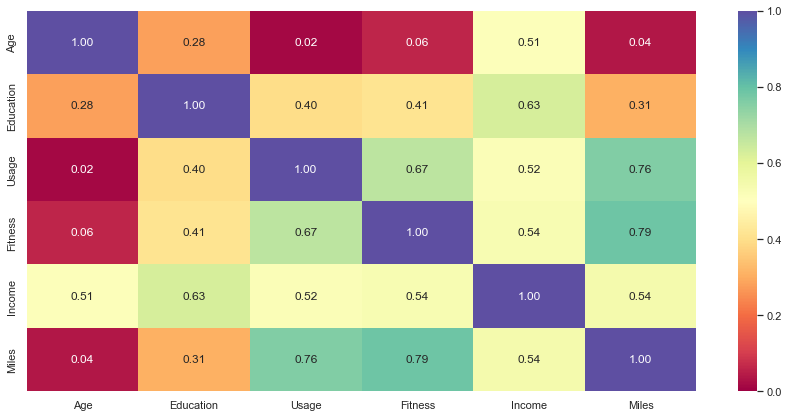

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=0, vmax=1, fmt=".2f", cmap="Spectral");
#Displays our correlation plot through a heatmap

Observation:
1. Some interesting positive correlations are between income and usage, fitness and miles. This would be a great area for further investigation.
2. High correlations between usage, fitness and miles are to be expected since the variables are related (i.e. the more active an individual is, the more all three variables would be simultaneously higher) - however it is interesting that between the three, fitness has a slighly lower correlation. This could be due to the fact that people can be high-fitness individuals in different ways other than running.
3. Education's only strong correlation is with income, which makes sense. It seems to only have weak correlations (0.25-0.5) with the other variables.
4. Age appears to have insignificant relations to usage, fitness and miles.

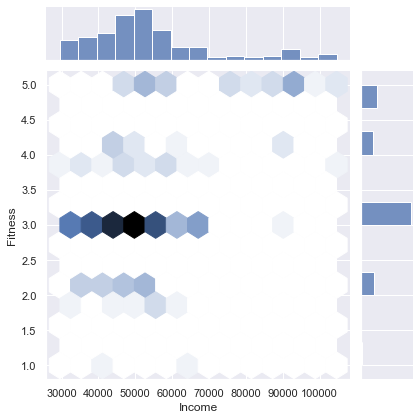

In [14]:
sns.jointplot(cardio['Income'],cardio['Fitness'], kind='hex');
#Uses a hexplot to show the relationship between Income and Fitness

Observations: There seems to be a sweet spot where most customers are typically at a 3.0 fitness level, making around 40-60k.

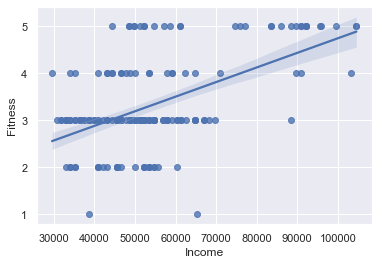

In [15]:
sns.regplot(y="Fitness", x="Income", data=cardio);
#Uses a regression plot to show the relationship between Income and Fitness

Observation: This line plot reinforces the positive correlation between these two variables.

## Bringing Product, Gender and Marital Status into the picture

For the next step, we will bring into the picture the categorical values: Product, Gender and Marital Status.

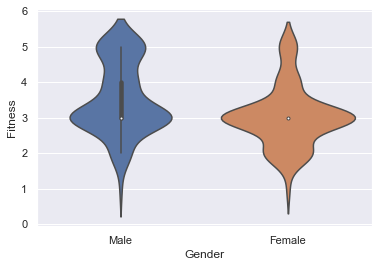

In [16]:
sns.violinplot(x='Gender', y='Fitness', data=cardio);
#Uses a violin plot to understand fitness level distributions across gender

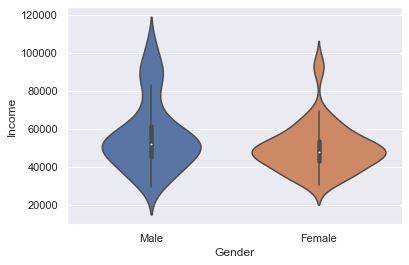

In [17]:
sns.violinplot(x='Gender', y='Income', data=cardio);
#Uses a violin plot to understand income distributions across gender

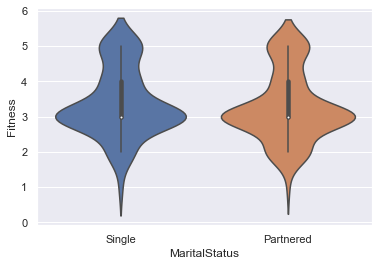

In [18]:
sns.violinplot(x='MaritalStatus', y='Fitness', data=cardio);
#Uses a violin plot to understand fitness level distributions across marital status

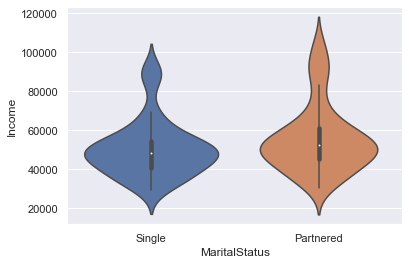

In [19]:
sns.violinplot(x='MaritalStatus', y='Income', data=cardio);
#Uses a violin plot to understand fitness level distributions across marital status

Observations:
1. Something to keep in mind is that females' fitness levels appear to skew a bit downwards, and that their incomes show some concentration within a more narrow range than men.
2. Men, on the other hand, appear to skew up with their fitness levels, and show a greater income distribution.
3. Being partnered showes a greater income distribution thatn being single.
4. These observations will serve a great context when assessing these categorical values ffrom a product-centric view.

In [20]:
print(cardio['Product'].unique())
print(cardio['Gender'].unique())
print(cardio['MaritalStatus'].unique())
#Shows the unique values within each categorical variable

['TM195' 'TM498' 'TM798']
['Male' 'Female']
['Single' 'Partnered']


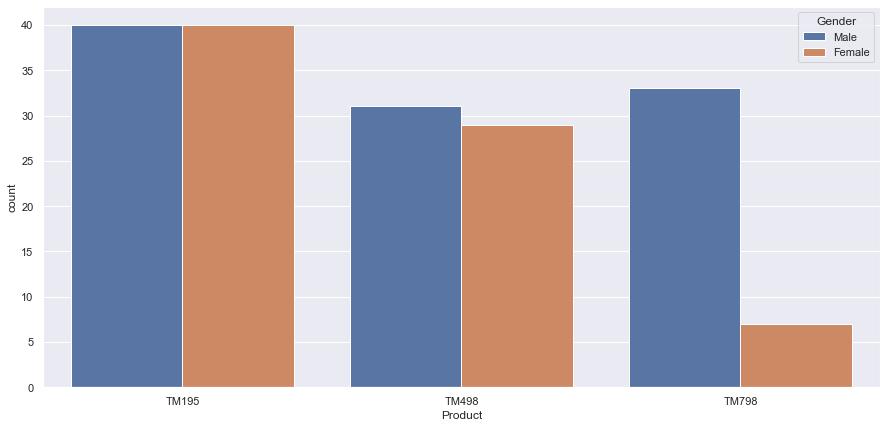

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Product', data=cardio, hue='Gender');
#Shows value counts for each distinct product no. and gender

Observations:
1. TM195 appears to be the most popular product across both genders.
2. TM798 being the least frequently used product.
2. However, TM798 users are overwhelmingly male, which is interesting. Having the most eye-catching differentiators from the get-go, we can start to build a customer profile for this product. First, we need more context.

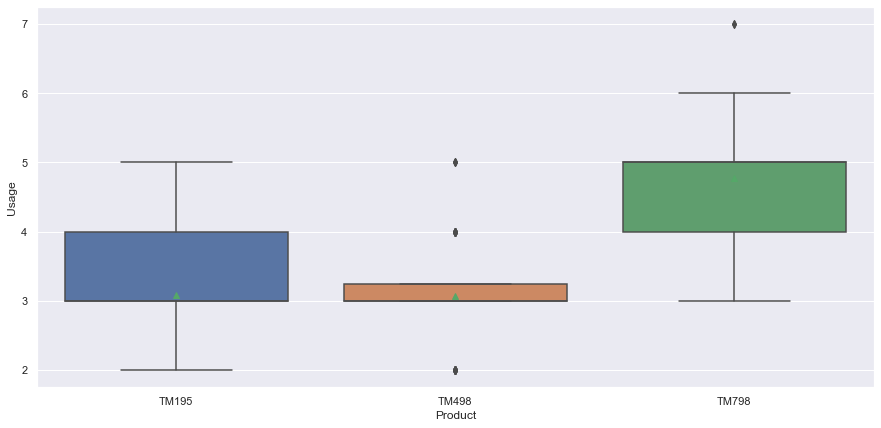

In [22]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Product',y='Usage', data=cardio, showmeans=True);
#Uses a boxplot to understand the differences in usage levels and
#gender breakouts across the three products

Observation:
1. TM195, the most popular product, cater to customers who typical use it 3-4 times a week (according to the IQR).
2. TM498, which is a product receiving mid popularity, tends to be used slighly less frequently (again, according to the IQR).
3. TM798, which is a lesser-used product attracting majority male customers, tends to be used at a higher frequency compared to the other products. How does this translate when looking at fitness?

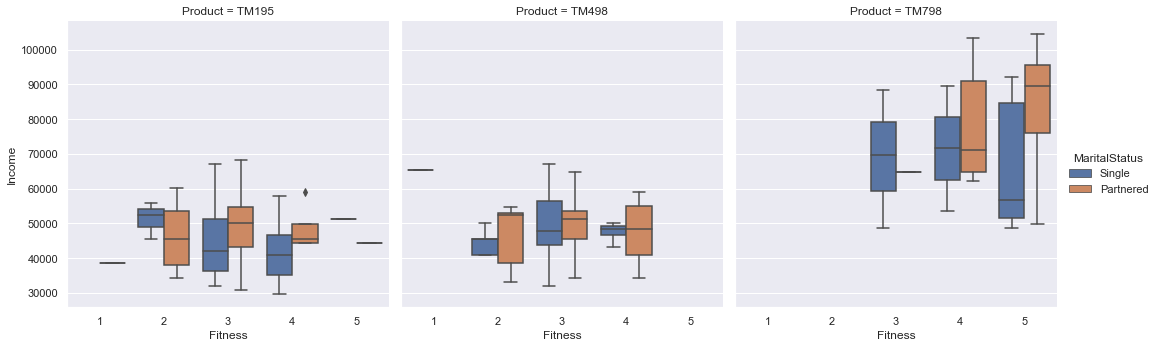

In [23]:
sns.catplot(x='Fitness',
            y='Income',
            hue="MaritalStatus",
            col="Product",
            data=cardio,
            kind="box");
#Creates a multivariate visual to provide visual comparions on different variables per product

Observations:
1. TM798 customers are fit, more often men than women, and also have an income range that stretches higher (~50k-100k+), which matches an earlier observation we had that income and fitness have a positive relationship.
2. TM195 appears to be a mass-appeal product, with the highest number of overall customers and an equal distribution of male and female users.
3. TM498 sits in the middle of the three products, with not as many overall customers, but appealing to the some of the same types of consumers as those who buy TM195. We know that customers of this product tend to use it slighly less often per week.
4. TM195 and TM498 once again show similarity in that the majority of their customers are within similar income brackets (~35k-60k) and are about the same fitness level
5. Marital Status does not appear to affect product choice, though when looking at TM798, those who are partnered have higher fitness levels than those who are single

## Looking at age to see if more light can be shed

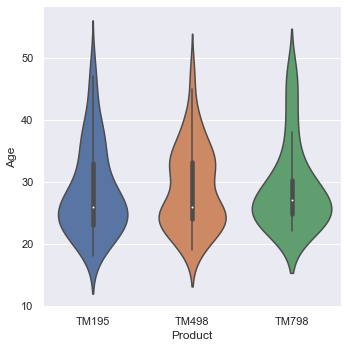

In [24]:
sns.catplot(x="Product", y="Age", data=cardio, kind="violin");
#Uses a violin plot to explore the distribution between Product and Age

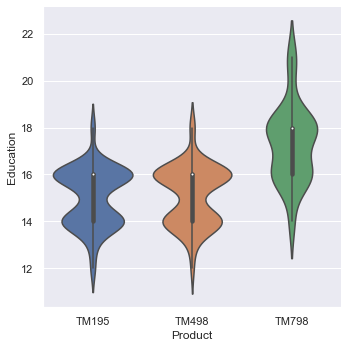

In [25]:
sns.catplot(x="Product", y="Education", data=cardio, kind="violin");
#Uses a violin plot to explore the distribution between Product and Education

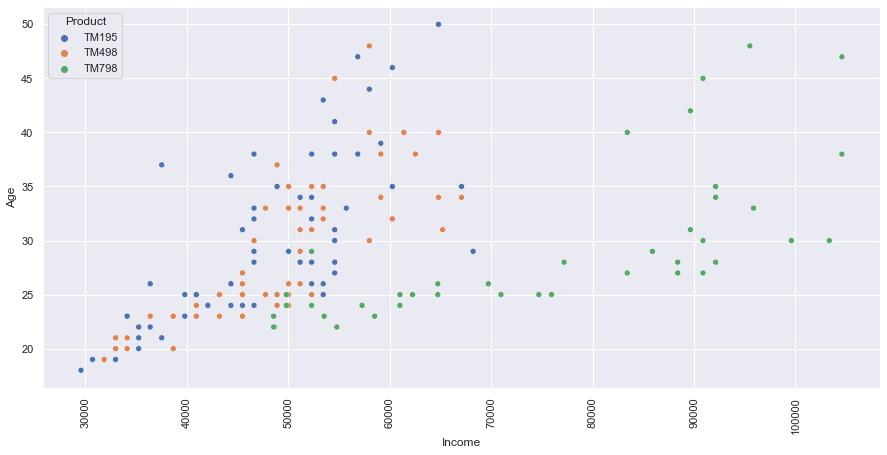

In [26]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Income", y="Age", data=cardio, ci=None, hue='Product')
plt.xticks(rotation=90); # To rotate the x axis labls
#Uses a scatterplot to explore the distribution between Product, Income, and Age

Observations:
1. Although initially age and education was not brought in due to its lack of relation to other key variables, it helps to illuminate further differences between the products.
2. TM498 shows a slighly denser distribution stretching upwards towards 40-year-olds and above, whereas the other two products and skewed younger.
3. The overall dataset is skewed relatively younger anyways, so taking that into account, the slightly older appeal apparent towards TM498 may be significant.
4. Customers of TM798 are also highly educated.

# Conclusion

Customer profiles (characteristics of a customer) of the different products:

TM798 customers are educated (most likely have post-grad degrees),fit and relatively young, more often men than women, and also have an income range that stretches higher (~50k-100k+)
* They fit the societal mold of being relatively "upper class"
* They are serious about their active lifestyles and have high weekly usage, which correlates to higher milage as well

Reccomendations:
* When targeting new customers for this product, huge selling points would be the durability of the machine for high milage use, as well as any feature that affirms the customer's fitness lifestyle (i.e. advanced technology that can help track biometrics, features that help prevent athlete injuries)
* Due to the customer profile of this product, there may be success in marketing the product as a high-end, luxury item geared more towards men's aesthetics

TM498 sits in the middle of the three products, with not as many overall customers, but appealing to the some of the same types of consumers as those who buy TM195. We know that customers of this product tends to be a bit older, use it slighly less often per week, and have a standard amount of education (i.e. high school or college graduates)
* Their main differentator is in age and lifestyle
* An example profile may be: a busy mom who doesn't have as much free time in her week, but would like to get some exercise in when she can

Reccomendations:
* When targeting new customers for this product, emphasize it's ease-of-use, friendliness, and due to a slighly older customer profile, safety features to prevent falls or other injuries
* Additionally, catering to a more low-mid income customer profile means that the price itself can be a seling point itself (vs. a high-end item geared towards customers who are less price-sensitive)

TM195 appears to be a mass-appeal product, with the highest number of overall customers and an equal distribution of male and female users. They, like TM498 customers, also have a standard amount of education (i.e. high school or college graduates). Customers of TM195 are well-rounded, and could be anyone - which may speak to the universal appeal of the product itself.

Reccomendations:
* When targeting new customers for this product, a suggestion may be to emphasize it's inclusivity towards runners of all levels and all ages
* Maintainin broad appeal is key
